In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
import formatting_utils
importlib.reload(formatting_utils)
from formatting_utils import panel_to_table, plot_daily_nan_proportion_heatmap

This notebook is for starting with `panel_data_1min.parquet` (from Marius) and build the `stock_prices_csv` file, for clustering.

In [2]:
data_local = "../../FBD_local_data/"
data_repo = "../Data/"

In [3]:
# ==== IMPORT THE FILE FROM DESKTOP AND SAVE IN REPO ====
df_panel1min = pd.read_parquet(data_local + "panel_data_1min.parquet")
display(df_panel1min)

,timestamp,ticker,ask-price,ask-volume,bid-price,bid-volume,spread,mid-price,volume_imbalance,industry
0,2008-09-02 13:30:00,ABT,58.537504,605.0,58.309401,484.0,0.228103,58.423452,-0.111111,healthcare
1,2008-09-02 13:30:00,ALL,45.757730,163.0,45.637612,67.0,0.120118,45.697671,-0.417391,financials
2,2008-09-02 13:30:00,BAC,33.007500,13393.0,32.955497,8656.0,0.052003,32.981498,-0.214840,financials
3,2008-09-02 13:30:00,BAX,68.484787,328.0,68.272418,153.0,0.212368,68.378602,-0.363825,healthcare
4,2008-09-02 13:30:00,BK,35.365500,280.0,35.302484,153.0,0.063016,35.333992,-0.293303,financials
...,...,...,...,...,...,...,...,...,...,...
2731242,2008-12-30 21:55:00,T,28.240000,1065.0,28.190000,1.0,0.050000,28.215000,-0.998124,communication_services
2731243,2008-12-30 21:55:00,WAG,23.960000,53.0,23.940000,106.0,0.020000,23.950000,0.333333,consumer_defensive
2731244,2008-12-30 21:55:00,WFC,28.820000,1.0,28.700000,59.0,0.120000,28.760000,0.966667,financials
2731245,2008-12-30 21:55:00,WMB,14.330000,415.0,14.310000,606.0,0.020000,14.320000,0.187071,energy


In [4]:
DATA = {}

In [5]:
# Save DataFrames in master dictionary
DATA["PRICE"] = panel_to_table(df_panel1min, attribute="mid-price", aggfunc="last", disp=False)
DATA["VOLUME"] = panel_to_table(df_panel1min, attribute="bid-volume", aggfunc="last", disp=False)

#Retrieve TICKERS
TICKERS = DATA["PRICE"].columns.to_list()[1:]

# Write csv in repo
DATA["PRICE"].to_csv(data_local + "stock_prices.csv")
DATA["VOLUME"].to_csv(data_local + "stock_volumes.csv")


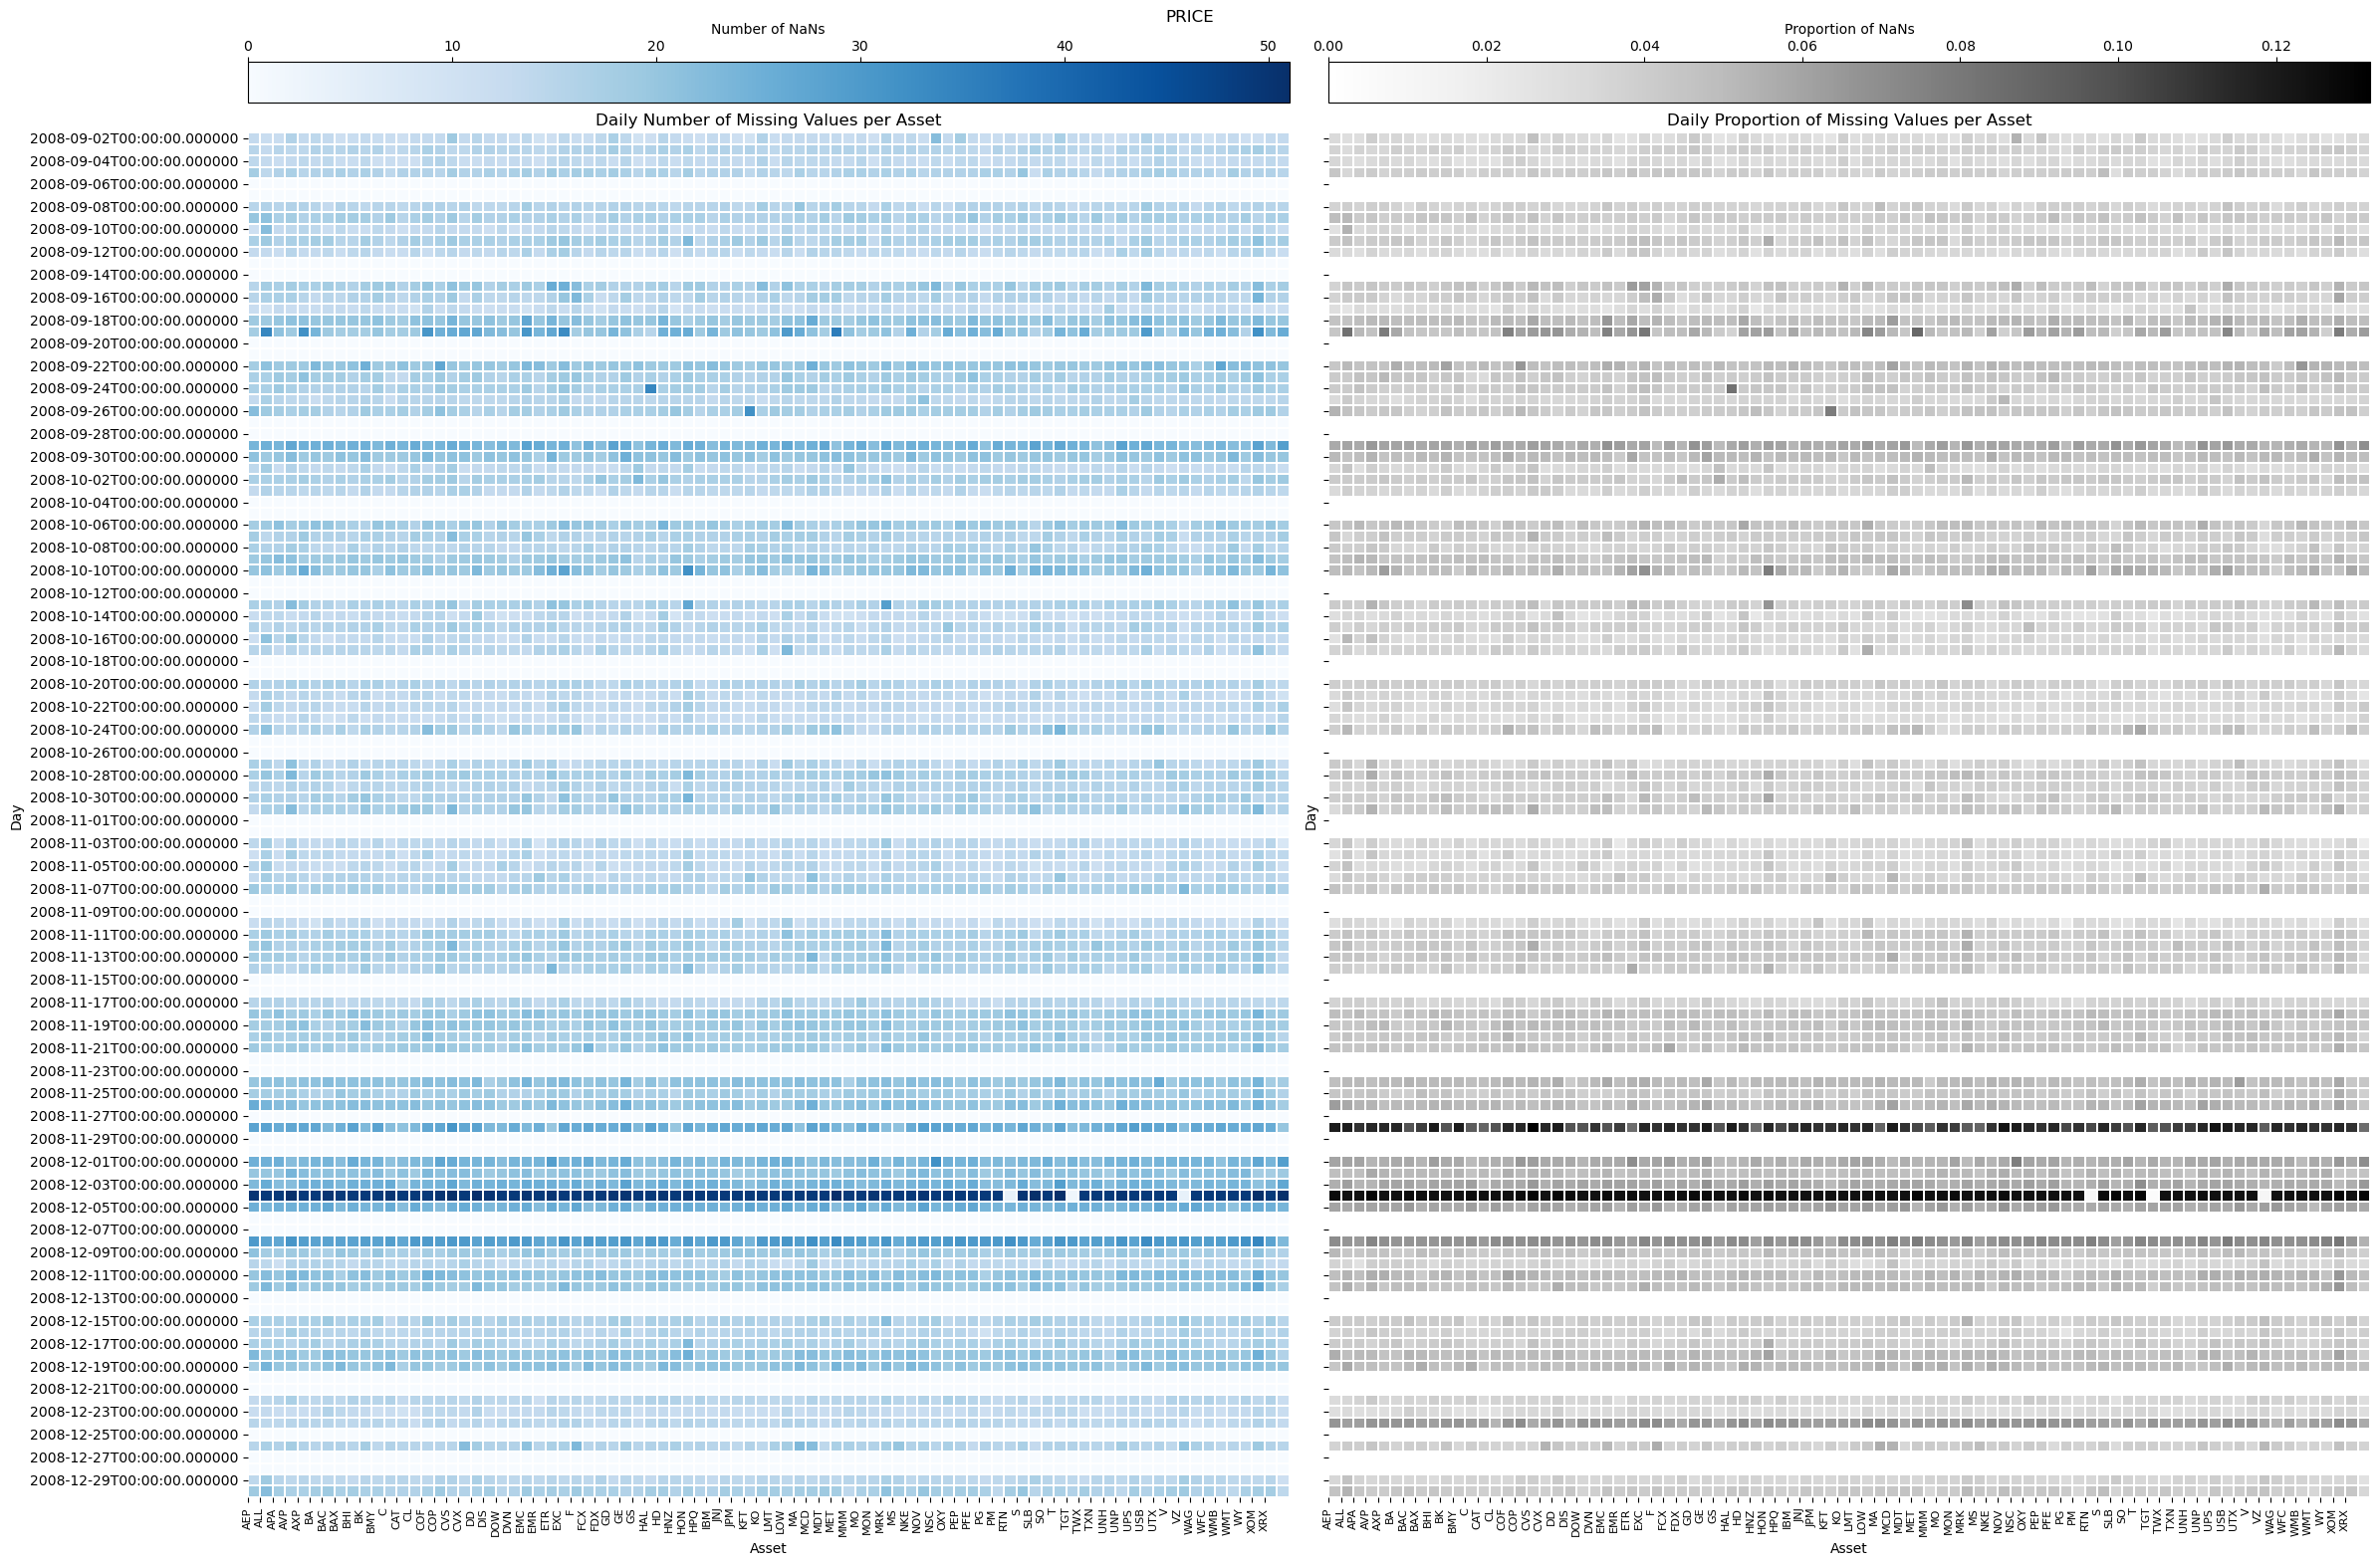

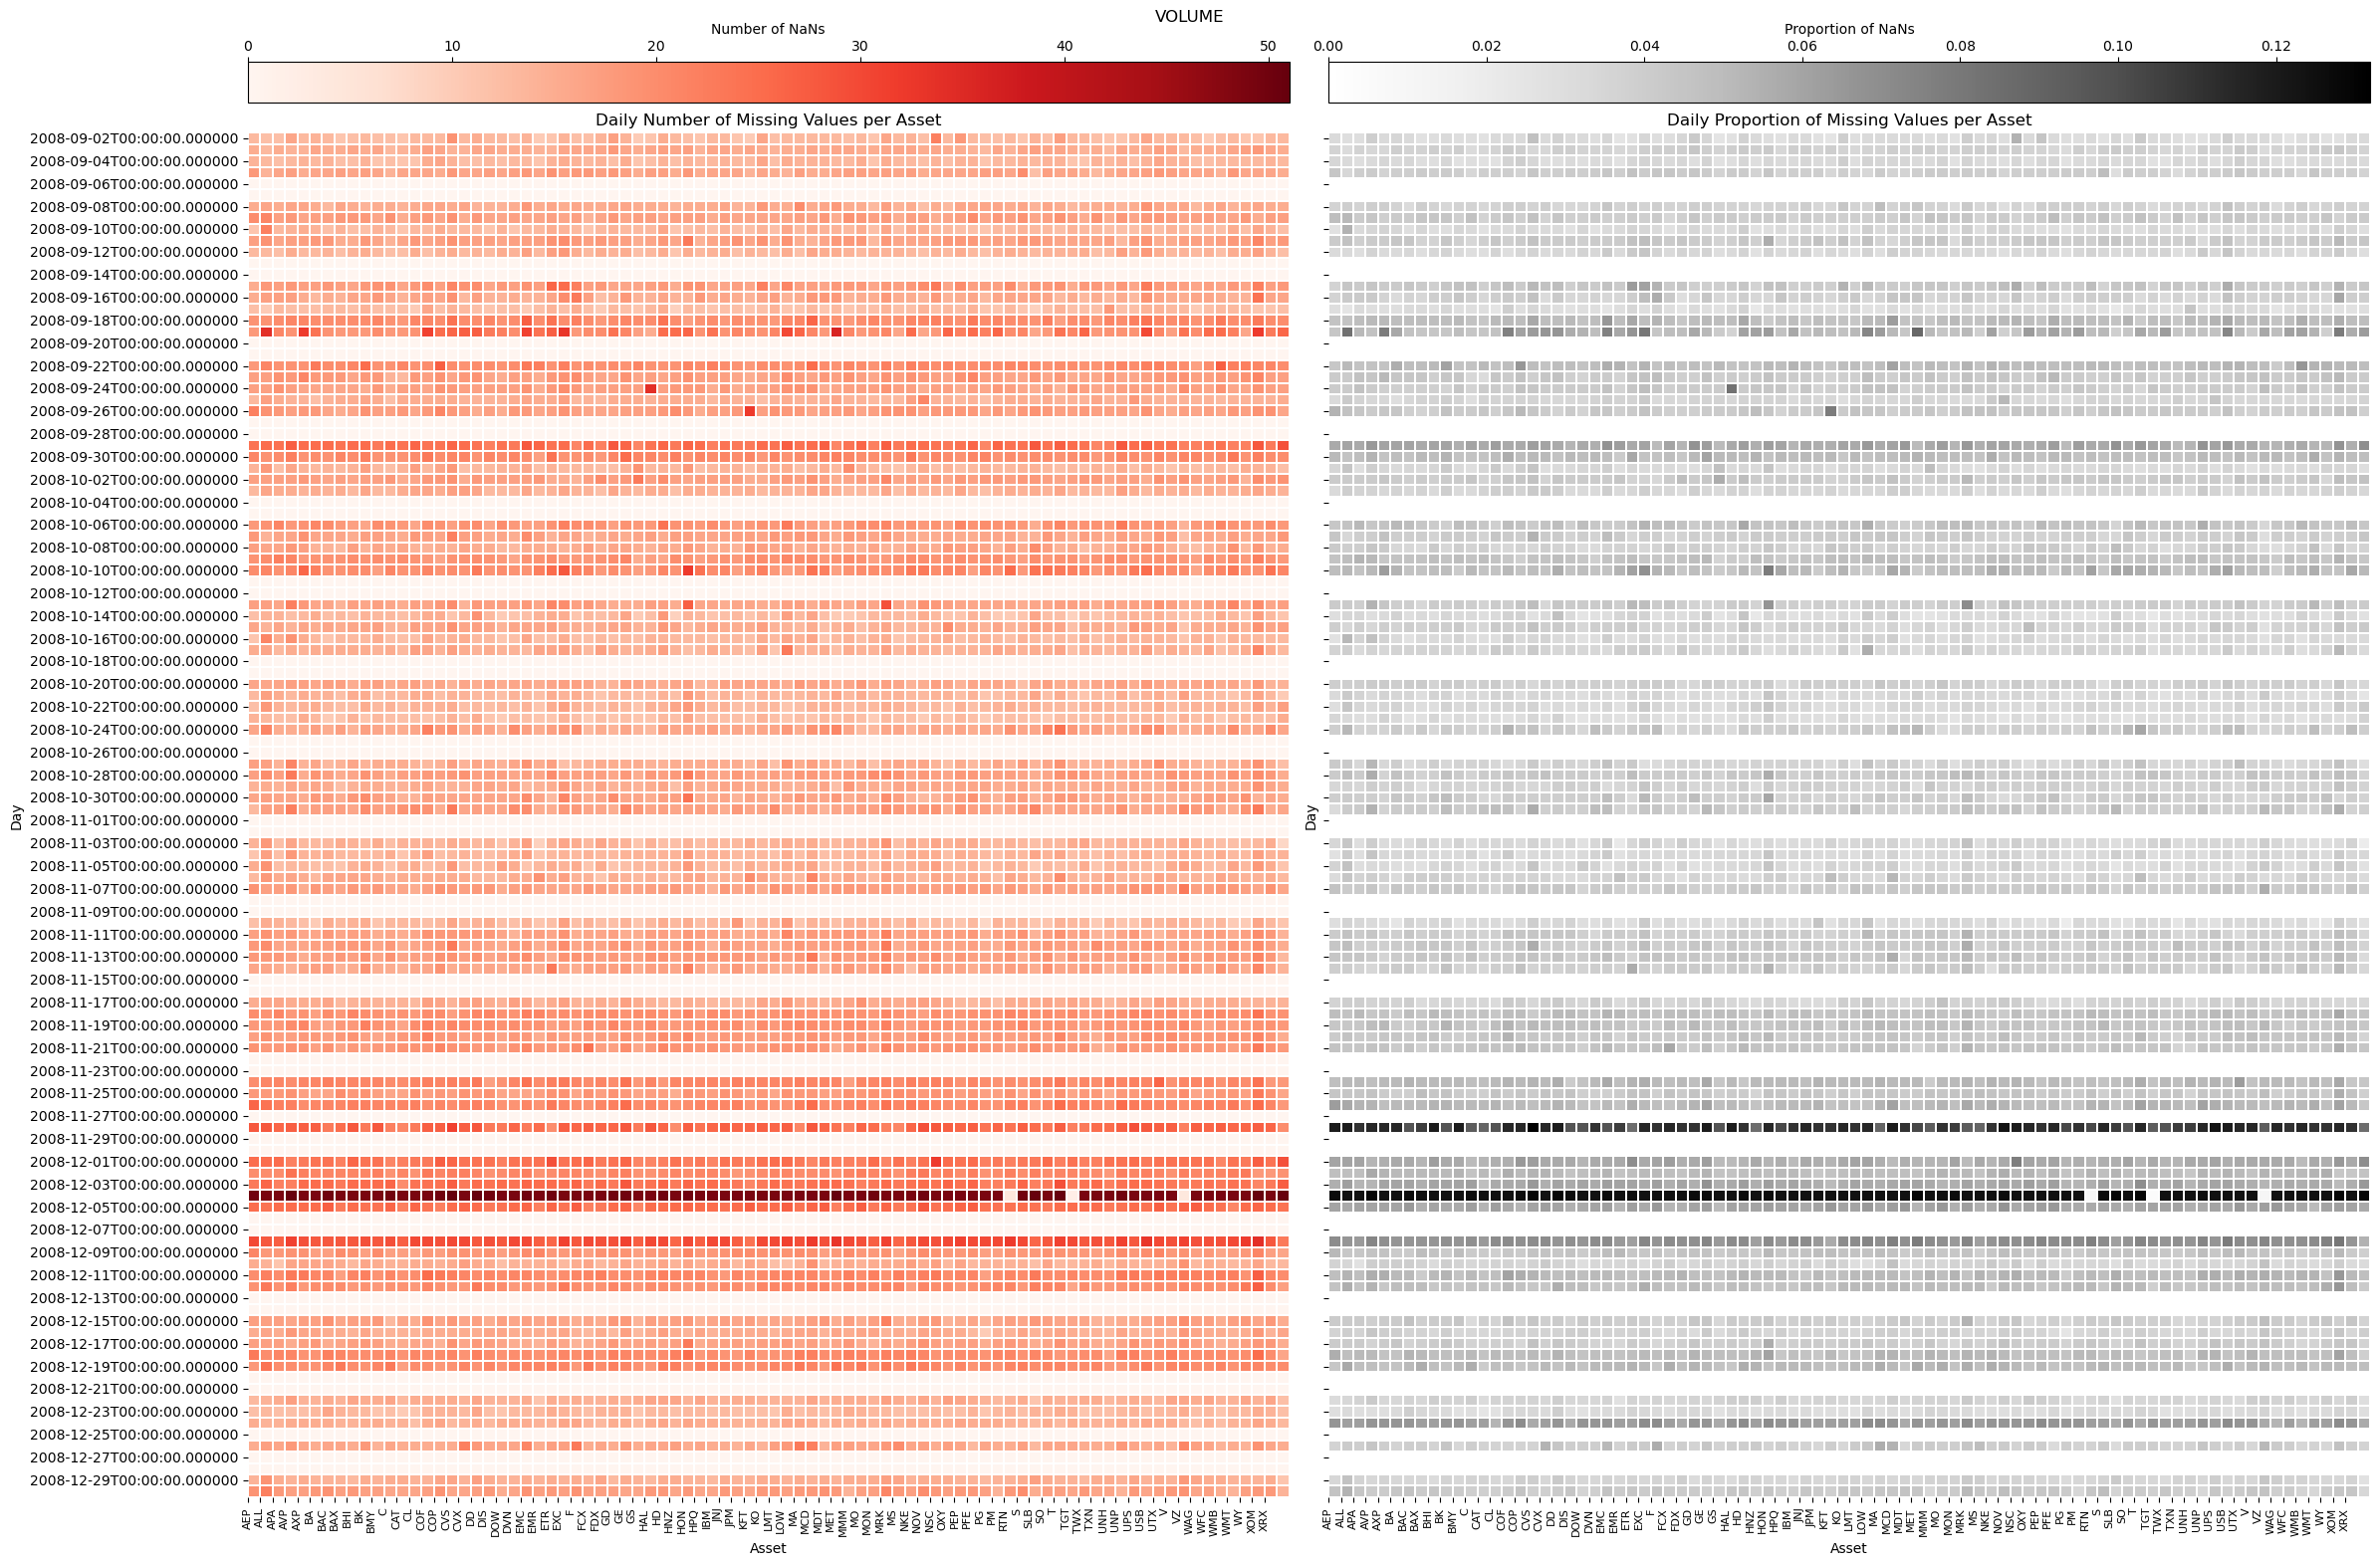

In [6]:
plot_daily_nan_proportion_heatmap(DATA["PRICE"], "PRICE", TICKERS, gradient_count="Blues", gradient_prop="Grays")
plot_daily_nan_proportion_heatmap(DATA["VOLUME"], "VOLUME", TICKERS, gradient_count="Reds", gradient_prop="Grays")